In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.api import adfuller
from datetime import date
import matplotlib.pyplot as plt

In [24]:
s1 = yf.download('JPM', date(2020, 1, 1), date.today())
s2 = yf.download('WFC', date(2020, 1, 1), date.today())
ma = 30
data = pd.DataFrame({'s1':s1['Adj Close'], 's2':s2['Adj Close']}, index = s1.index)
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,s1,s2
Date,,
2020-01-02,131.047974,50.750065
2020-01-03,129.318619,50.438473
2020-01-06,129.215805,50.136341
2020-01-07,127.019058,49.720890
2020-01-08,128.009918,49.871971


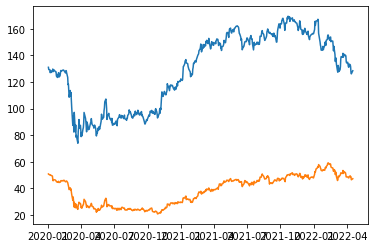

In [25]:
plt.plot(data['s1'])
plt.plot(data['s2'])
plt.show()

In [26]:
X1, X2 = np.log(data['s1']), np.log(data['s2'])
x1 = sm.add_constant(X1)
data['Hedge Ratio'] = RollingOLS(X2, X1, window=ma).fit().params
data['Spread'] = (X2 - data['Hedge Ratio']*X1)

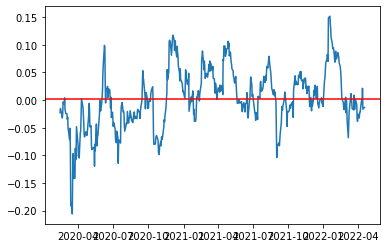

In [27]:
plt.plot(data['Spread'])
plt.axhline(y=data['Spread'].mean(), color='r')
plt.show()

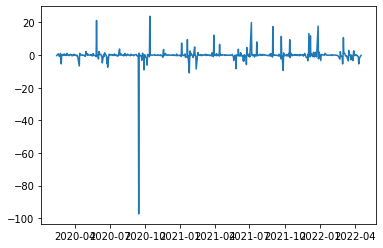

In [28]:
plt.plot(data['Spread'].pct_change())
plt.show()

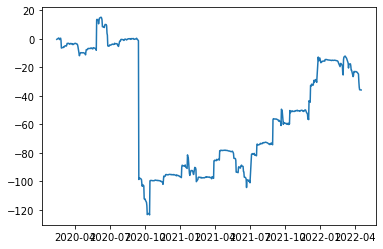

In [29]:
plt.plot(data['Spread'].pct_change().cumsum())
plt.show()

In [30]:
data['Z_Score'] = (data['Spread']-data['Spread'].rolling(window=ma).mean())/data['Spread'].rolling(window=ma).std()

In [31]:
data['Trade periods long'] = data['Z_Score'].where((data['Z_Score'] <= -2)|(data['Z_Score'] >= 0)).ffill()

In [32]:
data['Trades long'] = -(1-(np.sign(data['Trade periods long'])))/2

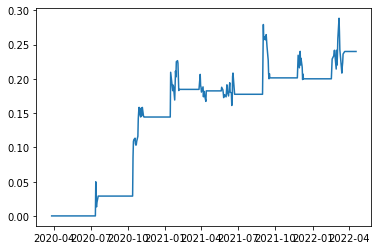

In [34]:
plt.plot(((data['s2'].pct_change()-data["Hedge Ratio"]*data['s1'].pct_change())*data['Trades long']).cumsum())
plt.show()

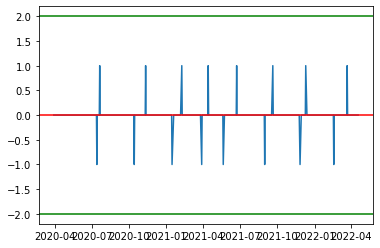

In [33]:
data['enter/exit'] = data['Trades long'].diff()
plt.plot(data['enter/exit'])
plt.axhline(y=0, color='r')
plt.axhline(y=2, color='g')
plt.axhline(y=-2, color='g')
plt.show()